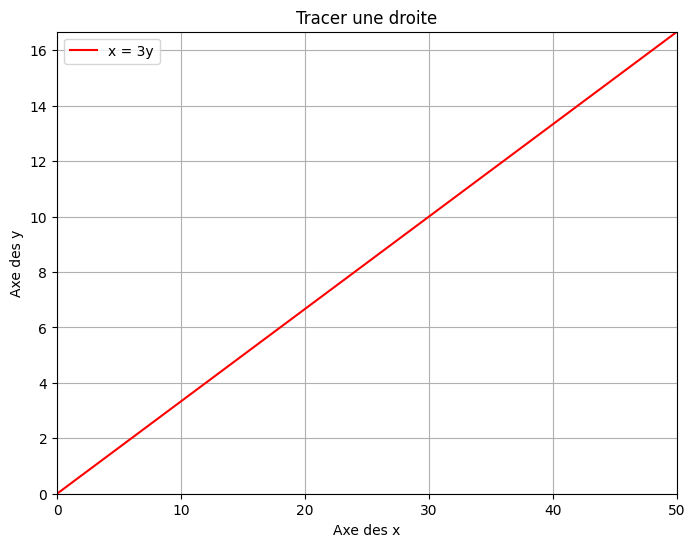

In [ ]:
import matplotlib.pyplot as plt

# Données pour l'axe des abscisses (x) allant de 0 à 50
x = range(51)

# Calcul des valeurs correspondantes pour l'axe des ordonnées (y) avec x = 3y
y = [xi / 3 for xi in x]

# Création du graphique
plt.figure(figsize=(8, 6))  # Taille du graphique

# Tracer la droite d'équation x = 3y en rouge
plt.plot(x, y, color='red', label='x = 3y')

# Définir les étiquettes des axes
plt.xlabel('Axe des x')
plt.ylabel('Axe des y')

# Définir les limites des axes
plt.xlim(0, 50)
plt.ylim(0, 50/3)

# Ajouter le titre du graphique
plt.title('Tracer une droite')

# Ajouter une légende
plt.legend()

# Afficher le graphique
plt.grid(True)  # Ajouter une grille
plt.show()


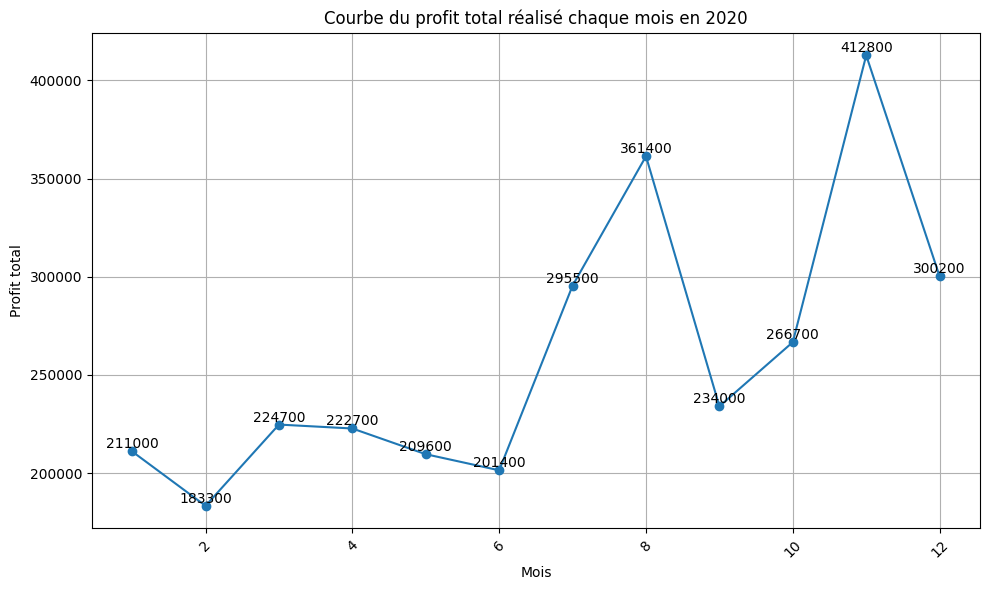

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données depuis le fichier CSV
data = pd.read_csv('/content/company_sales_data.csv')

# Créer le graphique
plt.figure(figsize=(10, 6))  # Taille du graphique

# Tracer la courbe du profit total par mois
plt.plot(data['month_number'], data['total_profit'], marker='o', linestyle='-')

# Définir les étiquettes des axes
plt.xlabel('Mois')
plt.ylabel('Profit total')

# Ajouter le titre du graphique
plt.title('Courbe du profit total réalisé chaque mois en 2020')

# Afficher les valeurs des points sur la courbe
for x, y in zip(data['month_number'], data['total_profit']):
    plt.text(x, y, f'{y}', ha='center', va='bottom')

# Rotation des étiquettes de l'axe des x pour une meilleure lisibilité
plt.xticks(rotation=45)

# Afficher le graphique
plt.grid(True)  # Ajouter une grille
plt.tight_layout()  # Ajuster la disposition du graphique pour éviter le chevauchement des éléments
plt.show()


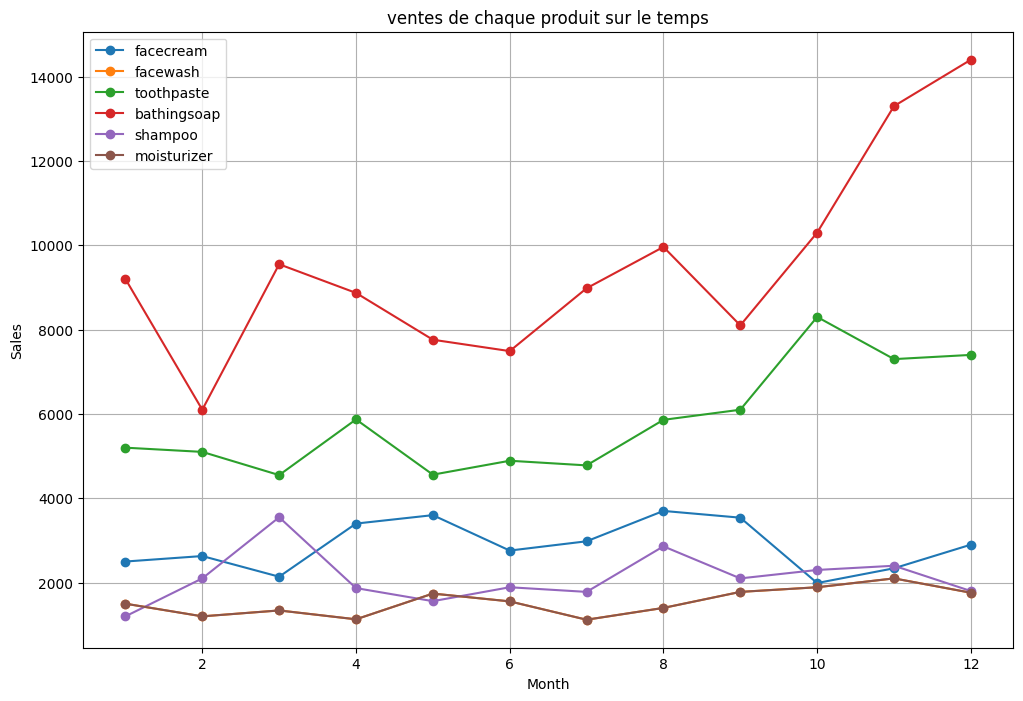

In [ ]:
# Plotting sales over time for each product
products = ['facecream', 'facewash', 'toothpaste', 'bathingsoap', 'shampoo', 'moisturizer']

plt.figure(figsize=(12,8))

for product in products:
    plt.plot(data['month_number'], data[product], marker='o', linestyle='-')

plt.title('ventes de chaque produit sur le temps')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.legend(products)
plt.show()


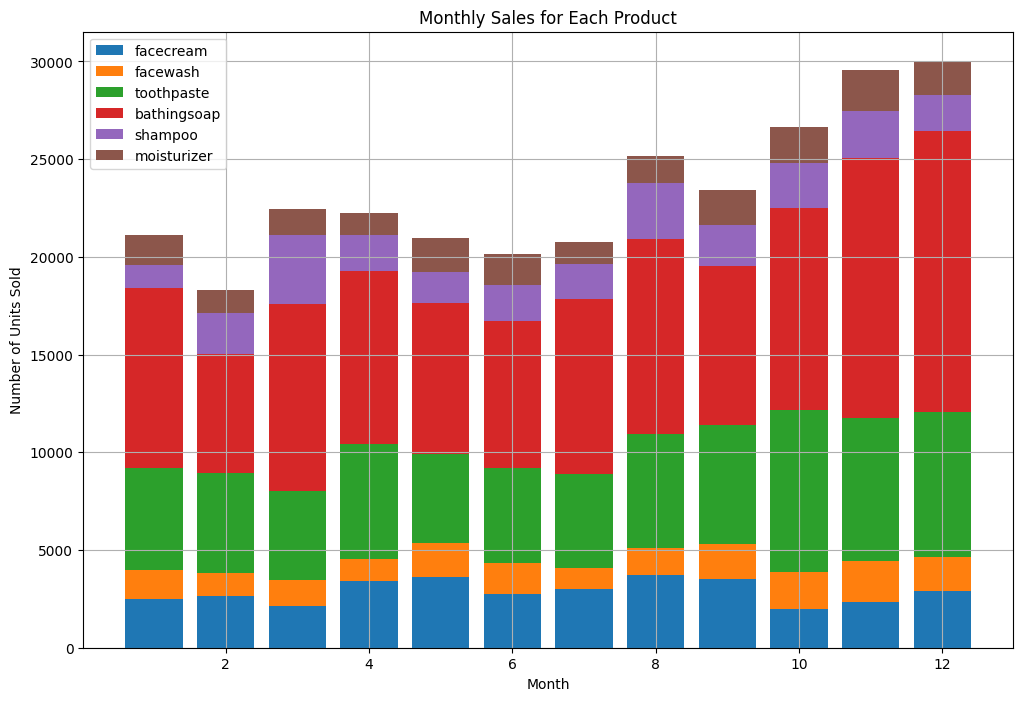

In [ ]:


plt.figure(figsize=(12,8))


bottom = [0]*len(data)

for product in products:
    plt.bar(data['month_number'], data[product], bottom=bottom)
    bottom += data[product]

plt.title('Monthly Sales for Each Product')
plt.xlabel('Month')
plt.ylabel('Number of Units Sold')
plt.grid(True)
plt.legend(products)
plt.show()


In [ ]:
# Let's load the data and have a quick look at it
customers = pd.read_csv('/content/customers.csv')
products = pd.read_csv('/content/products.csv')
transactions = pd.read_csv('/content/transactions.csv')

products.head()


,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [ ]:
# Let's count the number of products in each category
product_counts = products['categ'].value_counts()
product_counts


0    2309
1     739
2     239
Name: categ, dtype: int64

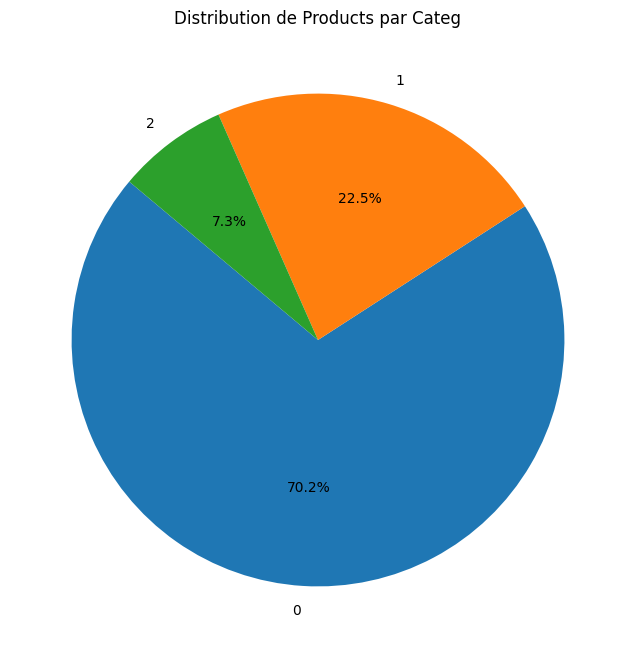

In [ ]:
# Plotting a pie chart for the distribution of products by category

plt.figure(figsize=(8,8))
plt.pie(product_counts, labels=product_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution de Products par Categ')
plt.show()


In [ ]:
sales_data = pd.merge(transactions, products, how='left', on='id_prod')

# effacement des lignes ou les dates sont au mauvais format
sales_data = sales_data[sales_data['date'].str.contains("test") == False]

# conversion en datetime
sales_data['date'] = pd.to_datetime(sales_data['date'])

# Groupby de la categorie et la date (month-year) pour calculer le revenu mensuel
sales_data['month_year'] = sales_data['date'].dt.to_period('M')
monthly_revenue = sales_data.groupby(['categ', 'month_year'])['price'].sum().reset_index()

# Pivot the data to get categories as columns
pivot_monthly_revenue = monthly_revenue.pivot(index='month_year', columns='categ', values='price').fillna(0)

pivot_monthly_revenue.head()

categ,0.0,1.0,2.0
month_year,,,
2021-03,193566.38,186974.17,98771.48
2021-04,205159.67,156138.35,111682.70
2021-05,196114.96,165893.40,127359.59
2021-06,167886.34,189162.04,124209.56
2021-07,144711.92,188523.27,147663.47


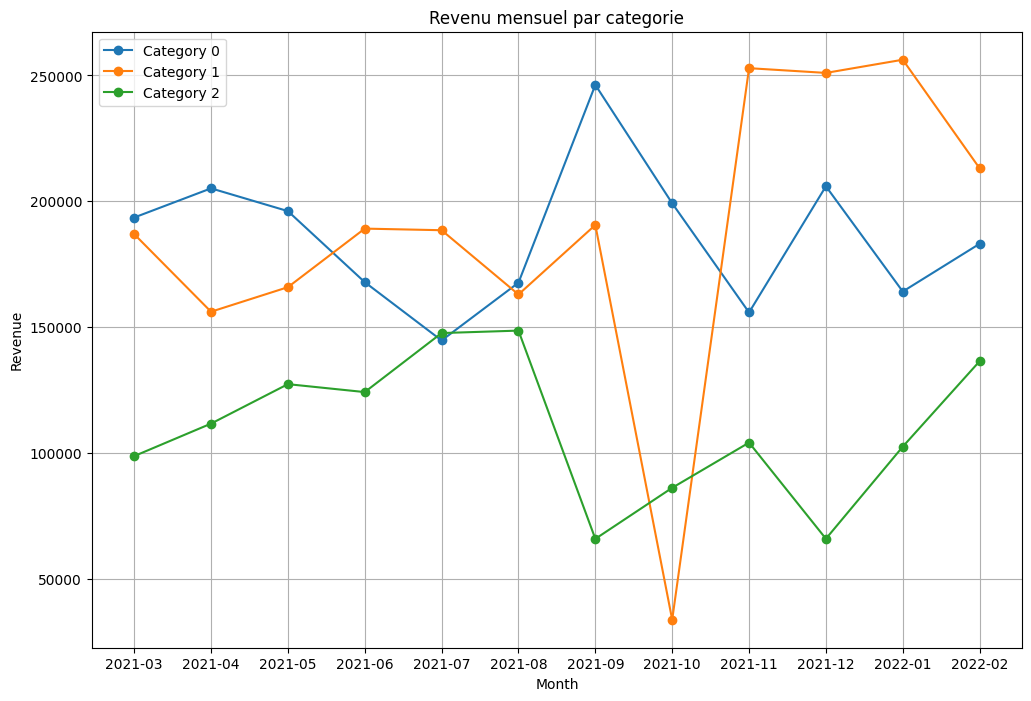

In [ ]:
# Plotting the revenue over time for each category

plt.figure(figsize=(12,8))

for category in pivot_monthly_revenue.columns:
    plt.plot(pivot_monthly_revenue.index.strftime('%Y-%m'), pivot_monthly_revenue[category], marker='o', linestyle='-')

plt.title('Revenu mensuel par categorie')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid(True)
plt.legend(['Category ' + str(int(cat)) for cat in pivot_monthly_revenue.columns])
plt.show()


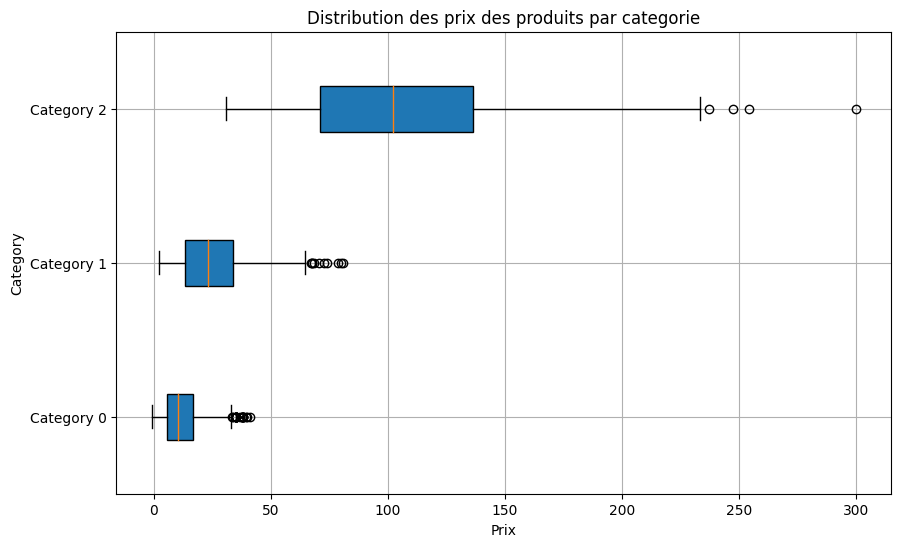

In [ ]:
# Plotting a boxplot for the distribution of product prices by category

plt.figure(figsize=(10,6))

plt.boxplot([products[products['categ'] == i]['price'] for i in range(3)], vert=False, patch_artist=True)
plt.title('Distribution des prix des produits par categorie')
plt.xlabel('Prix')
plt.ylabel('Category')
plt.yticks([1, 2, 3], ['Category 0', 'Category 1', 'Category 2'])
plt.grid(True)
plt.show()


In [ ]:
# merge de sales_data avec customers
sales_data = pd.merge(sales_data, customers, how='left', on='client_id')

# Groupby du genre et la date (month-year) pour calculer le revenu mensuel
gender_monthly_revenue = sales_data.groupby(['sex', 'month_year'])['price'].sum().reset_index()

# Pivot the data to get genders as columns
pivot_gender_monthly_revenue = gender_monthly_revenue.pivot(index='month_year', columns='sex', values='price').fillna(0)

pivot_gender_monthly_revenue.head()


sex,f,m
month_year,,
2021-03,234869.71,244442.32
2021-04,235599.98,237380.74
2021-05,244252.29,245115.66
2021-06,235741.64,245516.30
2021-07,235373.42,245525.24


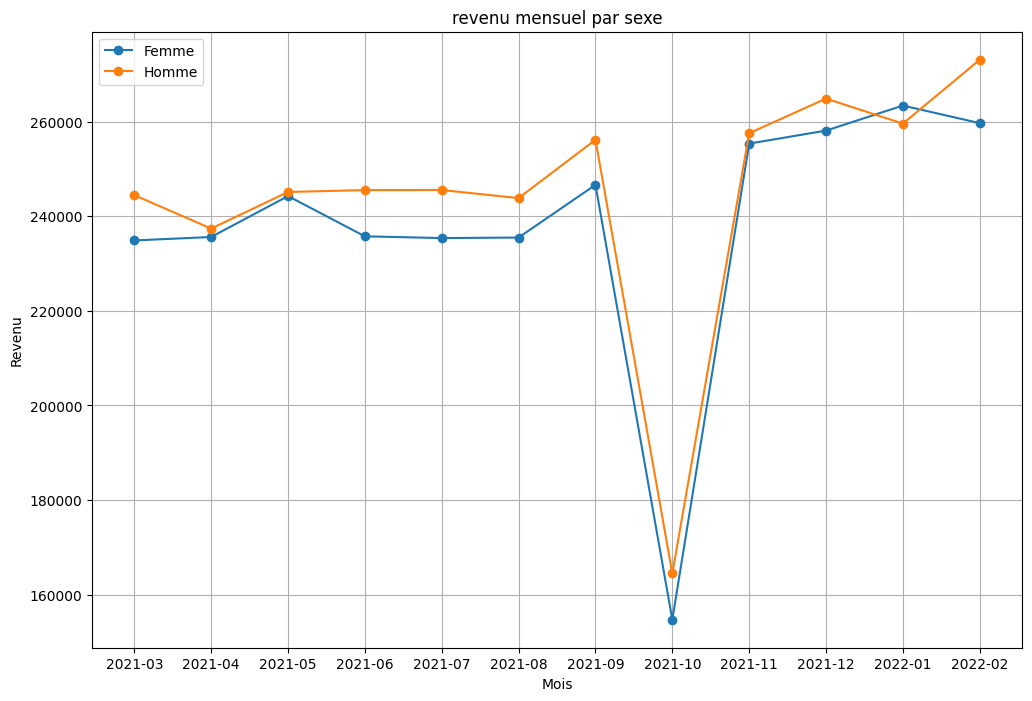

In [ ]:
# Plot du revenue selon le sexe

plt.figure(figsize=(12,8))

for gender in pivot_gender_monthly_revenue.columns:
    plt.plot(pivot_gender_monthly_revenue.index.strftime('%Y-%m'), pivot_gender_monthly_revenue[gender], marker='o', linestyle='-')

plt.title('revenu mensuel par sexe')
plt.xlabel('Mois')
plt.ylabel('Revenu')
plt.grid(True)
plt.legend(['Femme', 'Homme'])
plt.show()


In [ ]:
# calculons l'age des consommateurs
sales_data['age'] = sales_data['date'].dt.year - sales_data['birth']

# Definitions les bins et labels des age
bins = [18, 30, 40, 50, 60, sales_data['age'].max()+1]
labels = ['18-29', '30-39', '40-49', '50-59', '60+']

# Ajout de la colonne age_group au dataframe
sales_data['age_group'] = pd.cut(sales_data['age'], bins=bins, labels=labels, right=False)

# Grouper par age_group et calculer la somme des transactions
age_group_transactions = sales_data.groupby('age_group')['price'].sum().reset_index()

age_group_transactions


,age_group,price
0,18-29,1338426.05
1,30-39,1274824.03
2,40-49,1455772.25
3,50-59,792258.03
4,60+,694627.50


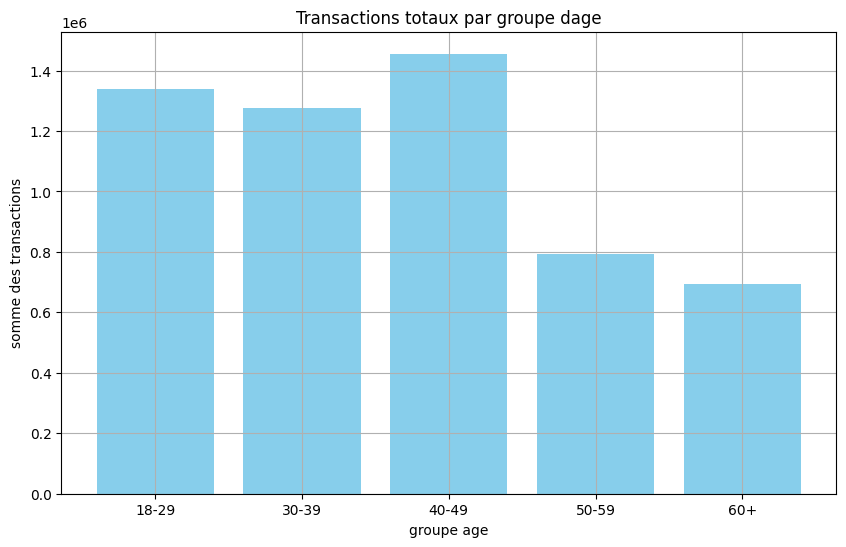

In [ ]:
# Plotting the total transaction amount for each age group

plt.figure(figsize=(10,6))
plt.bar(age_group_transactions['age_group'], age_group_transactions['price'], color='skyblue')
plt.title('Transactions totaux par groupe dage')
plt.xlabel('groupe age')
plt.ylabel('somme des transactions')
plt.grid(True)
plt.show()


In [ ]:
# association du product pour calculer le nombre total d'unités vendus
product_sales = sales_data.groupby('id_prod')['price'].agg(['count', 'first']).reset_index()

# on renomme les colonnes pour la clarity
product_sales.columns = ['id_prod', 'units_sold', 'price']

product_sales.head()


,id_prod,units_sold,price
0,0_0,611,3.75
1,0_1,249,10.99
2,0_10,12,17.95
3,0_100,2,20.60
4,0_1000,222,6.84


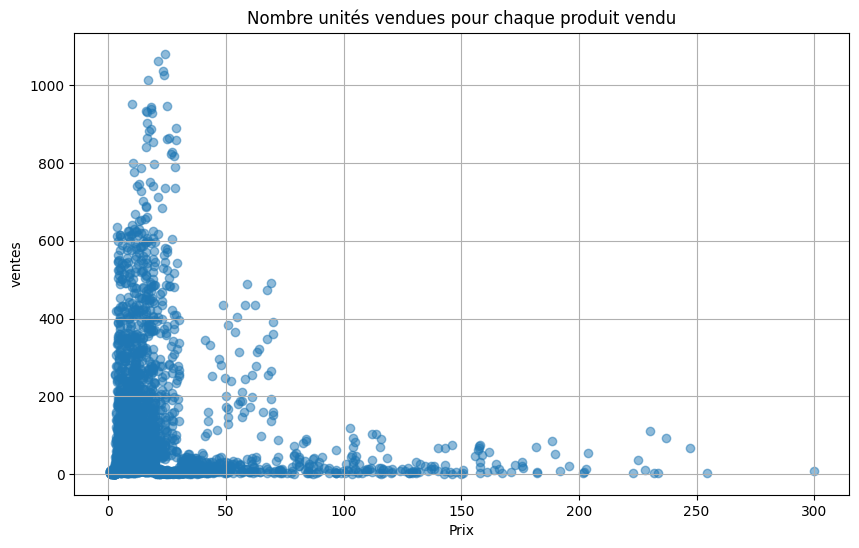

In [ ]:
# SCatterplot du nombre d'unités vendus pour chaque produit contre son prix

plt.figure(figsize=(10,6))
plt.scatter(product_sales['price'], product_sales['units_sold'], alpha=0.5)
plt.title('Nombre unités vendues pour chaque produit vendu')
plt.xlabel('Prix')
plt.ylabel('ventes')
plt.grid(True)
plt.show()


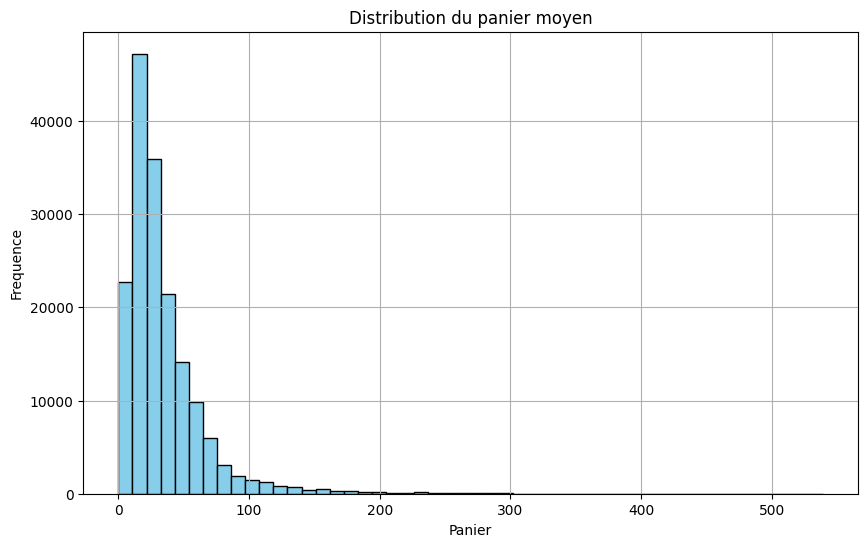

In [ ]:
# Groupby de session_id pour calculer le montant total (panier)
panier = sales_data.groupby('session_id')['price'].sum()

# Plot d'un histogramme pour la distribution moyenne des paniers

plt.figure(figsize=(10,6))
plt.hist(panier, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution du panier moyen')
plt.xlabel('Panier')
plt.ylabel('Frequence')
plt.grid(True)
plt.show()


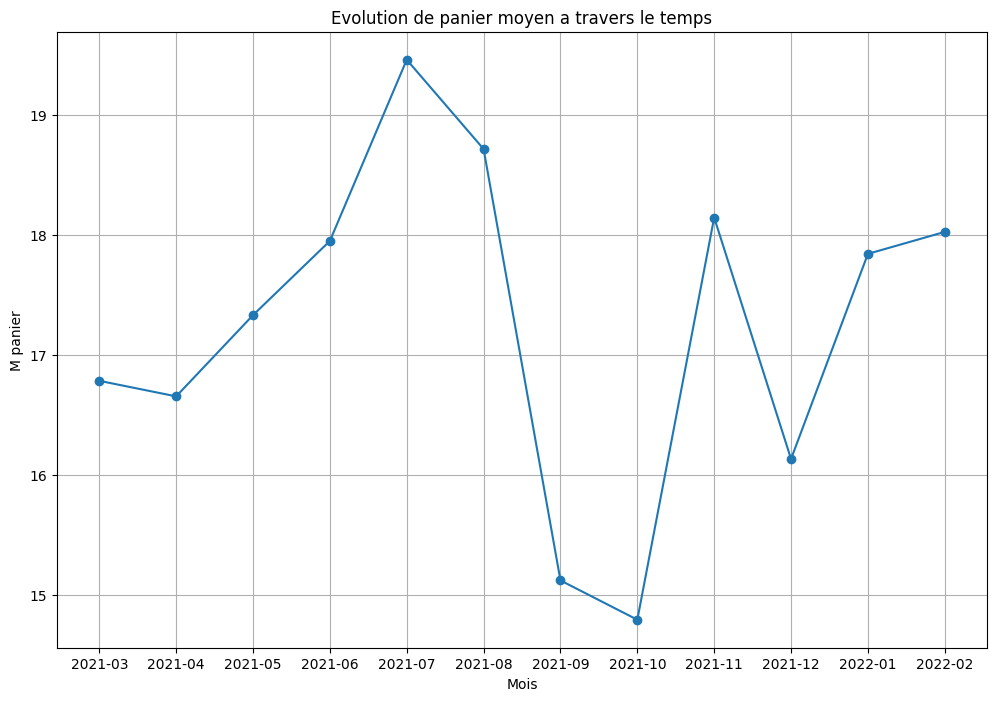

In [ ]:
# 4. Evolution of average basket amount over time

# Group by date (month-year) to calculate the average basket amount
average_basket = sales_data.groupby('month_year')['price'].mean().reset_index()

plt.figure(figsize=(12,8))
plt.plot(average_basket['month_year'].dt.strftime('%Y-%m'), average_basket['price'], marker='o', linestyle='-')
plt.title('Evolution de panier moyen a travers le temps')
plt.xlabel('Mois')
plt.ylabel('M panier')
plt.grid(True)
plt.show()


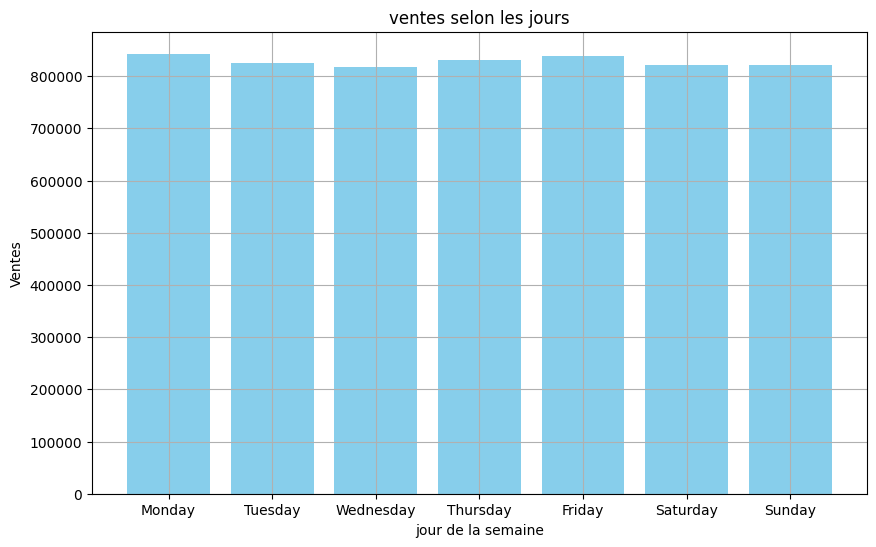

In [ ]:
# 1. Sales distribution by day of the week

# Add a weekday column to the data
sales_data['weekday'] = sales_data['date'].dt.weekday

# Group by weekday and calculate the sum of sales
weekday_sales = sales_data.groupby('weekday')['price'].sum().reset_index()

weekday_sales['weekday'] = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10,6))
plt.bar(weekday_sales['weekday'], weekday_sales['price'], color='skyblue')
plt.title('ventes selon les jours')
plt.xlabel('jour de la semaine')
plt.ylabel('Ventes')
plt.grid(True)
plt.show()
